# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
data[0]

{'counties': [{'name': 'Dade', 'population': 12345},
  {'name': 'Broward', 'population': 40000},
  {'name': 'Palm Beach', 'population': 60000}],
 'info': {'governor': 'Rick Scott'},
 'shortname': 'FL',
 'state': 'Florida'}

In [6]:
json_normalize(data)

,counties,info.governor,shortname,state
0,"[{'population': 12345, 'name': 'Dade'}, {'popu...",Rick Scott,FL,Florida
1,"[{'population': 1234, 'name': 'Summit'}, {'pop...",John Kasich,OH,Ohio


In [7]:
# use normalization to create tables from nested eleme,'info'nt
json_normalize(data, 'counties','shortname','state')

,name,population,stateshortname
0,Dade,12345,FL
1,Broward,40000,FL
2,Palm Beach,60000,FL
3,Summit,1234,OH
4,Cuyahoga,1337,OH


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('F:\Data Science\data_wrangling_json\data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

ValueError: Expected object or value

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [15]:
json_df=pd.read_json('F:\Data Science\data_wrangling_json\data/world_bank_projects.json')

In [16]:
#json_df.to_excel('F:\Data Science\data_wrangling_json\data/world_bank.xlsx')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


# Find the 10 countries with most projects

## Get the Count of Project for each country

In [17]:
cntry_cnt=pd.DataFrame({'proejct_count':json_df.groupby(['countryname']).size()})

In [18]:
cntry_cnt.head()

,proejct_count
countryname,
Africa,11
Antigua and Barbuda,1
Arab Republic of Egypt,2
Argentine Republic,2
Bosnia and Herzegovina,1


## Reset the Index

In [19]:
cntry_cnt_idx=cntry_cnt.reset_index(level=0)

In [181]:
cntry_cnt_idx.head()

,countryname,proejct_count
0,Africa,11
1,Antigua and Barbuda,1
2,Arab Republic of Egypt,2
3,Argentine Republic,2
4,Bosnia and Herzegovina,1


## Get the top Ten countries

In [20]:
cntry_cnt_idx.sort_values('proejct_count', ascending=False).head(10)

,countryname,proejct_count
39,People's Republic of China,19
64,Republic of Indonesia,19
107,Socialist Republic of Vietnam,17
63,Republic of India,16
97,Republic of Yemen,13
38,People's Republic of Bangladesh,12
34,Nepal,12
25,Kingdom of Morocco,12
76,Republic of Mozambique,11
0,Africa,11


In [167]:
import matplotlib.pyplot as plt
%matplotlib inline 

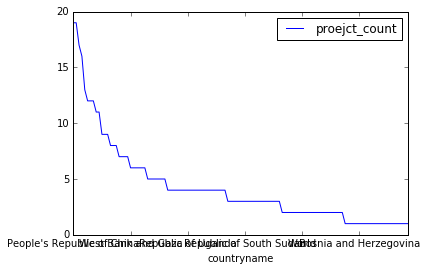

In [175]:
cntry_cnt_idx.sort_values('proejct_count', ascending=False).plot(x='countryname')


# Find the top 10 major project themes (using column 'mjtheme_namecode')

## Get the jason from as a list from file

In [21]:
prject_json=(json.load((open('F:\Data Science\data_wrangling_json\data/world_bank_projects.json'))))

## Normalize mjtheme_namecode

In [22]:
json_nm=json_normalize(prject_json,'mjtheme_namecode')

## Create a Dataframe with theme name and its count 

In [23]:
json_df=pd.DataFrame({'count':json_nm.groupby(['name']).size()})

## Reset the Index

In [24]:
json_df_idx=json_df.reset_index(level=0)

## Get the top 10 Major Project Themes

In [25]:
json_df_idx.sort_values('count',ascending=False).head(10)

,name,count
2,Environment and natural resources management,223
7,Rural development,202
4,Human development,197
5,Public sector governance,184
9,Social protection and risk management,158
3,Financial and private sector development,130
0,,122
8,Social dev/gender/inclusion,119
10,Trade and integration,72
11,Urban development,47


# Create a dataframe with the missing names filled in.

## Create a Dataset with Distinct name and code 

In [67]:
dis_name=json_nm[json_nm.name!=''].drop_duplicates()

## Join the two dataset on 'code' and get the missing name 

In [80]:
all_name=pd.merge(json_nm,dis_name,on='code')[['code','name_y']]

## Rename 'name_y' column to 'name' 

In [82]:
all_name.columns=['code','name']

In [83]:
all_name

,code,name
0,8,Human development
1,8,Human development
2,8,Human development
3,8,Human development
4,8,Human development
5,8,Human development
6,8,Human development
7,8,Human development
8,8,Human development
9,8,Human development
